<a href="https://colab.research.google.com/github/adgcal/CD-Analysis/blob/master/CD_ANAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Singular value decomposition (SVD) can be used to determine the amount of information present in a CD spectrum. If the CD spectra for a set of proteins are digitized to give intensities at each wavelength, then the data can be expressed as a matrix with the spectrum of each protein as a column (Hennessey and Johnson, 1981). The SVD theorem (Nobel and Daniel, 1977) tells us that any matrix can be decomposed into a product of three matrices </p>

\begin{equation}
A= USV^T
\end{equation}

that have important properties. The S matrix contains singular values on the main diagonal and zeros elsewhere. The singular value in each column corresponds to a column in the U matrix. The product **US** is a matrix with columns that can be considered to be basis CD spectra. **US has the same dimensions as the original data matrix**, and the **columns look like typical CD spectra when expressed graphically**. The $V^T$ matrix contains the coefficients which **fit the basis CD spectra to the protein CD spectra in the original data matrix, A**.</p>
The basis CD spectrum corresponding to the **largest singular value** is the most important shape for reproducing all of the original protein spectra. If we were to take a linear combination of two shapes to fit all the protein spectra, **the basis CD spectra corresponding to the two largest values ** would turn out to be the most important. This system can be extended to more basis spectra, and if we choose all of them, we will reproduce the original protein CD spectra exactly. The question then becomes: How many basis CD spectra are necessary to reproduce the original protein CD spectra within experimental error? **The number of basis CD spectra needed will be the information content of the protein CD spectra.**

Since the square of the singular values is the sum of the squares of the CD intensities from each protein that go into the corresponding basis CD spectrum, it is possible to calculate the error involved in ignoring basis spectra (Lloyd, 1968)
If  si are the singular values, Ν is the number of digitized points in each spectrum, standard deviation in the unit of $\Delta\epsilon$ is given by :
\begin{equation}
\sigma^2=\frac{\sum_i s_i^2}{N\cdot m}
\end{equation}
Ν is the number of digitized points in each spectrum, and the sum is over the m basis CD spectra that have been ignored.

In [ ]:
import numpy as np
from numpy import linalg as LA
import pandas as pd
import matplotlib.pyplot as plt
import os
import re
import networkx as nx
from sklearn.preprocessing import StandardScaler

In [ ]:
def findT(fname):
  T=[]
  TTCD=pd.read_csv(fname)
  ll=list(TTCD.columns.values)
  ll.remove(ll[0])
  for i in ll:  
    tt=re.findall(r'\d+', i)
    TT=list(map(float, tt) )
    T.append(TT[0])
  T=np.array(T)
  return T

def readCDT(fname):
  TTCD=pd.read_csv(fname)
  T=findT(fname)
  X=TTCD.values
  lam=X[:,0]
  lam=np.delete(lam,0)
  X=np.delete(X, 0, axis=1)
  X=np.delete(X, 0, axis=0)
  r,c=X.shape
  plt.figure(figsize=(8, 7))
  for i in range(c):
      plt.plot(lam,X[:,i],label=str(T[i]))
      plt.ylabel(r'$[\theta ^o] cm^2 dmol^{-1}\cdot 10^{-3} $')
      plt.xlabel(r'$\lambda (nm)$')
      plt.title(r'$T$ Variation')
      plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
  return T,lam,X 

def ratio_plots(TT,X,lam):
  # T  and X are obtained from function readcdT
  # Given X the function plots the ratio 
  # of 222:206 and 192:206 
  l_222=np.where(lam==222)[0]
  l_206=np.where(lam==206)[0]
  l_192=np.where(lam==192)[0]
  rat1=X[l_222[0],:]/X[l_206[0],:]
  rat2=X[l_192[0],:]/X[l_206[0],:]
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(6,4))
  plt.subplots_adjust(wspace=0.3, hspace=0.2)
  ax1.set_title("222:206")
  ax2.set_title("192:206")
  ax1.plot(TT,rat1,'ko-')
  ax2.plot(TT,rat2,'ks-')
  ax1.set(xlabel='T$^o$C', ylabel='Ratio')
  ax2.set(xlabel='T$^o$C', ylabel='Ratio')
  return rat1,rat2


def eigen_reconstruct(k,X):
  from numpy import linalg as LA
  U, s, VT = LA.svd(X)
  Sigma = np.zeros((X.shape[0], X.shape[1]))
  Sigma[:min(X.shape[0], X.shape[1]), :min(X.shape[0], X.shape[1])] = np.diag(s)
  X_approx = U[:, :k] @ Sigma[:k, :k] @ VT[:k, :]
  np.shape(VT)
  print("Initial population fraction of the two Major SVD componenrs",abs(np.round(VT[0,0],4)),abs(np.round(VT[1,0],4)))
  return X_approx,s,VT






In [ ]:

os.chdir("/content/drive/My Drive/Raja_CD/")

fnames=['cdT1.csv' , 'TFEEE_0.csv' , 'TFEEE_20.csv']
#type(fnames)
ss=[]
[ss.append(findT(i)) for i in fnames  ]
ss

[array([ 5., 10., 15., 20., 25., 30., 35., 40., 45., 50., 60.]),
 array([ 5., 10., 15., 20., 25., 35., 45., 55.]),
 array([ 5., 10., 15., 20., 25., 35., 45., 55.])]

# The three respective CD (T variation data) for different files 

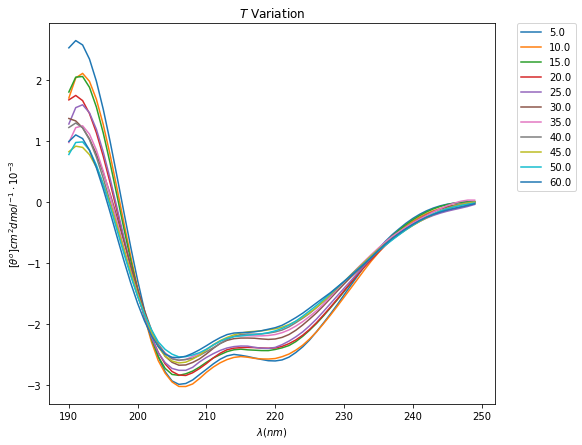

In [ ]:
TT0,lam0,X0 =readCDT(fnames[0])


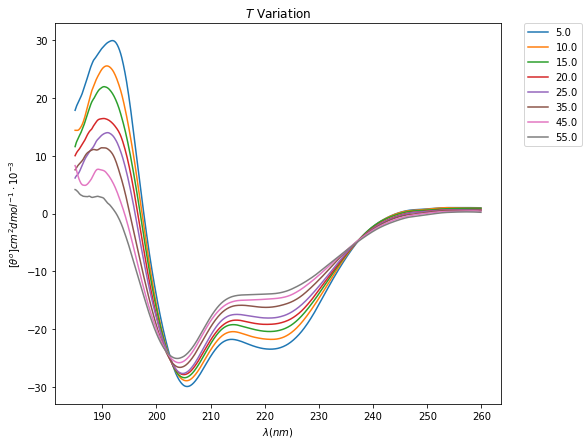

In [ ]:
TT1,lam1,X1 =readCDT(fnames[1])


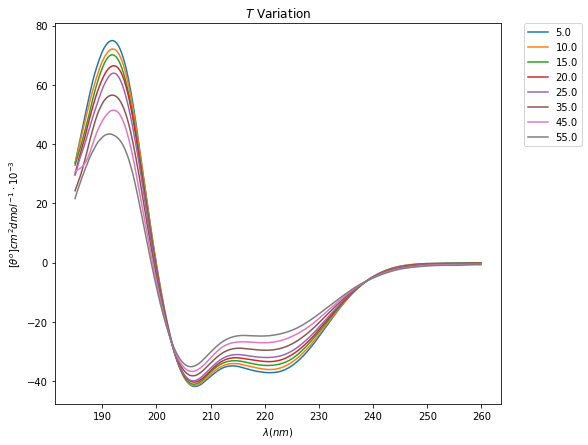

In [ ]:
TT2,lam2,X2 =readCDT(fnames[2])


#  T profile of  R1 and R2 transitions for the original spectra


(array([0.9057115 , 0.88139201, 0.8550662 , 0.83821208, 0.80676904,
        0.7741988 , 0.73115651, 0.69545205]),
 array([-1.83063418, -1.7664147 , -1.73483219, -1.67279983, -1.61909961,
        -1.49075652, -1.40658371, -1.22889229]))

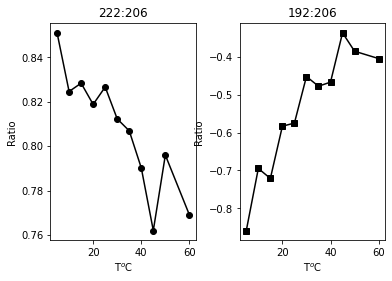

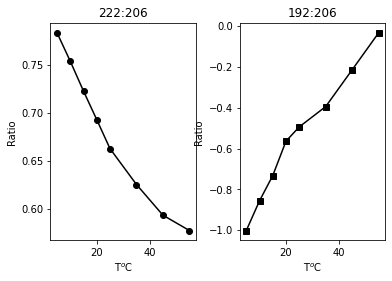

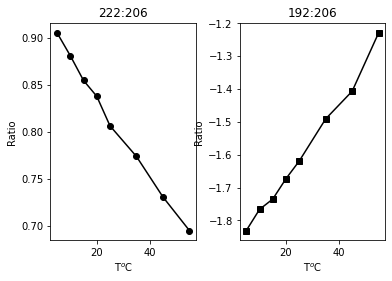

In [ ]:
[u0,v0]=ratio_plots(TT0,X0,lam0)
ratio_plots(TT1,X1,lam1)
ratio_plots(TT2,X2,lam2)

# Eigen reconstruction of spectra using k=2 and T profile of R1 and R2 transitions for the reconstructed spectra

Initial population fraction of the two Major SVD componenrs 0.3385 0.6248
Initial population fraction of the two Major SVD componenrs 0.4338 0.5183
Initial population fraction of the two Major SVD componenrs 0.4075 0.409


(array([0.89567727, 0.87772666, 0.8590858 , 0.84182435, 0.8163495 ,
        0.77573065, 0.736319  , 0.68485147]),
 array([-1.82776464, -1.77821472, -1.72675947, -1.67911187, -1.60879243,
        -1.49667029, -1.38788042, -1.24581215]))

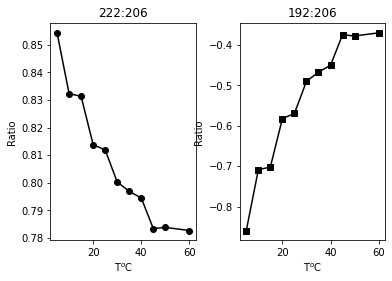

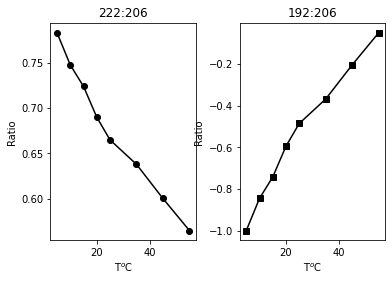

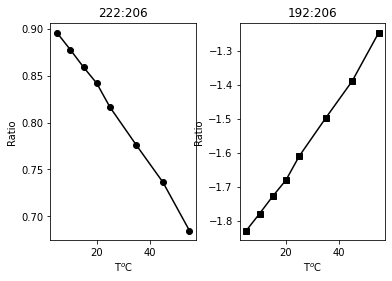

In [ ]:
X0_a,s0,VT0=eigen_reconstruct(2,X0)

X1_a,s1,VT1=eigen_reconstruct(2,X1)

X2_a,s2,VT2=eigen_reconstruct(2,X2)


ratio_plots(TT0,X0_a,lam0)

ratio_plots(TT1,X1_a,lam1)

ratio_plots(TT2,X2_a,lam2)








# Note added on 31st May 2020

In [ ]:


def epec(k,X,s,lam):
    Sigma = np.zeros((X.shape[0], X.shape[1]))
    Sigma[:min(X.shape[0], X.shape[1]), :min(X.shape[0], X.shape[1])] = np.diag(s)
    U, s, V = LA.svd(X)
    XY=U[:, :k] @ Sigma[:k, :k]
    np.shape(XY)
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,8))
    plt.subplots_adjust(wspace=0.3, hspace=0.2)
    ax1.plot(lam,XY[:,0])
    ax1.set_title("SVD 1")
    ax2.set_title("SVD 2")
    ax2.plot(lam,XY[:,1])
    return XY
    





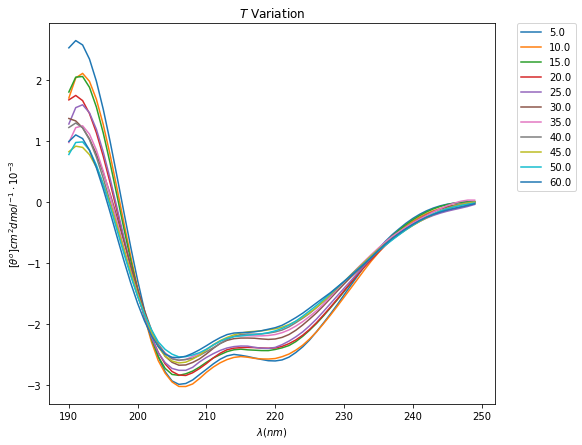

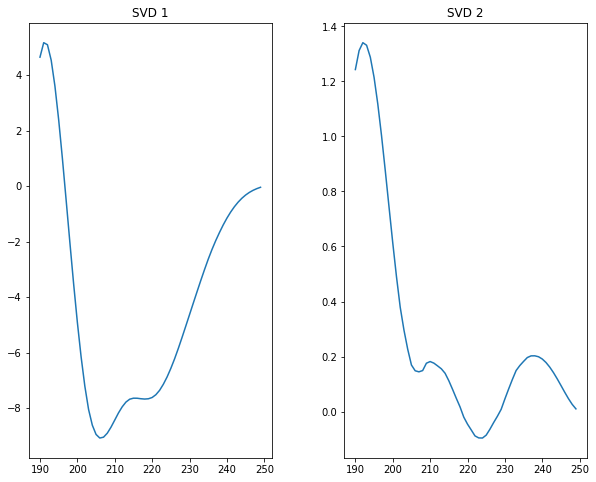

In [ ]:
fnames=['cdT1.csv' , 'TFEEE_0.csv' , 'TFEEE_20.csv']
TT0,lam0,X0 =readCDT(fnames[0])
XY=epec(2,X0,s0,lam0)



# At any given tempeerature T , the eigen spectra for the file fnames[i] (i=0 for the above, i.e 'cdT1.csv', should combine to generate the spectra. 
-  let us consider  that at t =5C, i.e. T=278K 
        - y=X0[:,0] should be a comination of the two eigen spectra y1 = XY[:,0] and y2=XY[:,1]
        - Assume that at 5C , the fraction of the two conformers are f and 1-f.
        - Thus y =Q.[f.y1 + (1-f).y2]
        - 

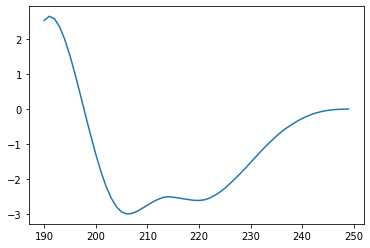

In [ ]:
plt.plot(lam0,X0[:,0])
plt.show()

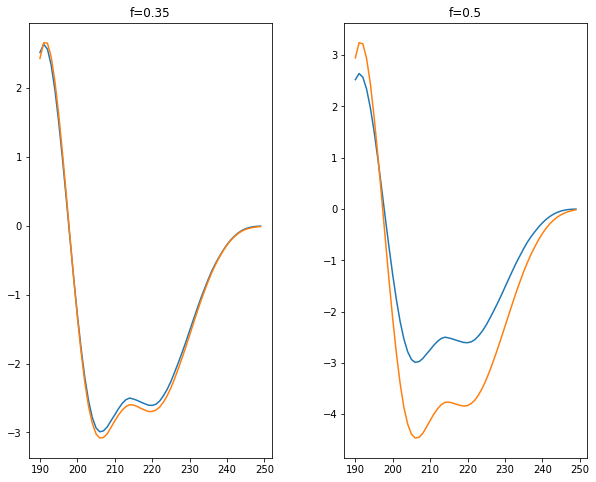

In [ ]:
y=X0[:,0]
y1=XY[:,0]
y2=XY[:,1]
# Two cases - f = 0.5 & f = 0.35
f1=0.35
f2=0.5
ycalc1 = y1*f1+(1-f1)*y2
ycalc2 = y1*f2+(1-f2)*y2
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,8))
plt.subplots_adjust(wspace=0.3, hspace=0.2)
ax1.plot(lam0,y)
ax1.plot(lam0,ycalc1)
ax1.set_title("f=0.35")
ax2.set_title("f=0.5")
ax2.plot(lam0,y)
ax2.plot(lam0,ycalc2)
plt.show()


## Ratio Finding at a  given T 
- Thus at temperature T=278K , the ratio of the two eigen population is closer to 0.35:0.65  
- If we assume Q =1, the mathematical problem will beto find the $f$ at which abs$\sum|(y-ycalc)|^2$ is minimum
- The problem is converted to a regression problem.


# Finding thermodynamic parameters 
- This will only evaluate f for a given T as $f=f(T)$

- The simpliest way to model f=f(T) is to assume :
    - $f = f_o.e^ \frac{-\Delta G_o}{RT}$
    - Thus if we plot log(f) against 1/T we may get an approximate value of melting
    - the chisquare fitting of the f with the activation profile will be of some interest


## Using the ratio profiles for finding the thermodynamic parameters 
- Instead of taking the above approach we ma also consider the approach 
- $rat1=rat1(T)$ & $rat2=rat2(T)$
- We can het the value of free energy of activatiom for both rat1 & rat2.

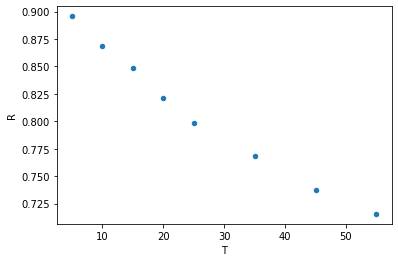

In [ ]:
os.chdir("/content/drive/My Drive/Raja_CD/")
df=pd.read_csv("v.csv")
df.plot('T', 'R', kind='scatter')
plt.show()




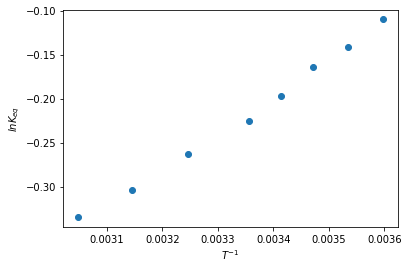

In [ ]:
T=df['T'].values+273.0
RR=df['R'].values
plt.plot(1./T,np.log(RR),'o')
plt.xlabel(r'$T^{-1} $')
plt.ylabel(r'$ln K_{eq}$')
plt.show()



 $\ln K = - \dfrac{\Delta_r{H^o}}{R} \dfrac{1}{T} + \dfrac{\Delta_r{S^o}}{R} $



<https://chem.libretexts.org/Bookshelves/Physical_and_Theoretical_Chemistry_Textbook_Maps/Map%3A_Physical_Chemistry_(McQuarrie_and_Simon)/26%3A_Chemical_Equilibrium/26.07%3A_The_Van't_Hoff_Equation>

-413.05816527620004

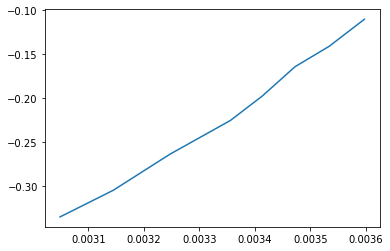

In [ ]:
# Let us now try linear regression
# Import curve fitting package from scipy
from scipy.optimize import curve_fit
def linfit(x, m, c):
    return m*x+c

x=1/T
y=np.log(RR)

pars, cov = curve_fit(f=linfit, xdata=x, ydata=y, p0=[0, 0], bounds=(-np.inf, np.inf))

deltaHnotbyR= - pars[0]
deltaSnotvyR=pars[1]

deltaHnotbyR



In [ ]:
from scipy.constants import codata
F = codata.physical_constants['Faraday constant'][0]
qe = codata.physical_constants['elementary charge'][0]
R = codata.physical_constants['molar gas constant'][0]
kB = codata.physical_constants['Boltzmann constant'][0]
kB_eV = codata.physical_constants['Boltzmann constant in eV/K'][0]
N_A = codata.physical_constants['Avogadro constant'][0]
F, R, qe, kB, kB_eV, N_A

(96485.33212,
 8.314462618,
 1.602176634e-19,
 1.380649e-23,
 8.617333262e-05,
 6.02214076e+23)

In [ ]:
deltaHnot=R*deltaHnotbyR
deltaSnot=R*deltaSnotvyR
L=[deltaHnot,deltaSnot]
type(L)
m=[]
for i in L:
   m.append("%.1f" % i)

m


['-3434.4', '-13.3']

Text(0.0035, -0.3, '-13.3')

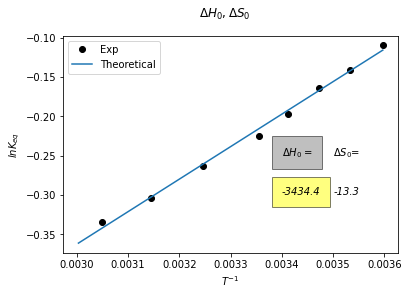

In [ ]:

#print(deltaHnot,deltaSnot)
fig = plt.figure()
ax = fig.add_subplot(111)

plt.plot(x,y,'ko',label='Exp')
x_dummy=np.linspace(5,60,100)
x_dummy=1/(x_dummy+273.0)
y_dummy=pars[0]*x_dummy +pars[1]
plt.plot(x_dummy,y_dummy,'-',label='Theoretical')
plt.xlabel(r'$T^{-1} $')
plt.ylabel(r'$ln K_{eq}$')
plt.legend()
fig.suptitle('$\Delta H_0, \Delta S_0$ ')
ax.text(0.0034, -0.25, '$\Delta H_0=$', style='italic',bbox={'facecolor': 'gray', 'alpha': 0.5, 'pad': 10})
ax.text(0.0034, -0.30, m[0], style='italic',bbox={'facecolor': 'yellow', 'alpha': 0.5, 'pad': 10})


ax.text(0.0035, -0.25, '$\Delta S_0$=', style='italic')
ax.text(0.0035, -0.30, m[1], style='italic')






['-1319.2', '-6.1']

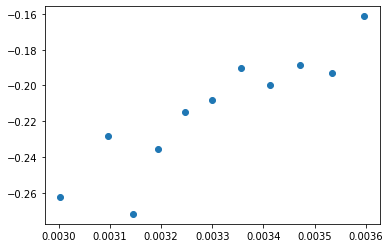

In [ ]:

T0=TT0+273
plt.plot(1./T0,np.log(u0),'o')

x=1/T0
y=np.log(u0)

pars, cov = curve_fit(f=linfit, xdata=x, ydata=y, p0=[0, 0], bounds=(-np.inf, np.inf))

deltaHnotbyR= - pars[0]
deltaSnotvyR=pars[1]
deltaHnot=R*deltaHnotbyR
deltaSnot=R*deltaSnotvyR
L=[deltaHnot,deltaSnot]
type(L)
m=[]
for i in L:
   m.append("%.1f" % i)

m











['-11910.2', '-44.8']

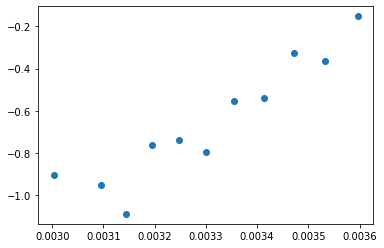

In [ ]:
T0=TT0+273
plt.plot(1./T0,np.log(-v0),'o')

x=1/T0
y=np.log(-v0)

pars, cov = curve_fit(f=linfit, xdata=x, ydata=y, p0=[0, 0], bounds=(-np.inf, np.inf))

deltaHnotbyR= - pars[0]
deltaSnotvyR=pars[1]
deltaHnot=R*deltaHnotbyR
deltaSnot=R*deltaSnotvyR
L=[deltaHnot,deltaSnot]
type(L)
m=[]
for i in L:
   m.append("%.1f" % i)

m


Thus the enthalpy and entropy are negative , enthalpy is about -3.4 kJ Mol-1 , entropy being -13.3 J Mol-1 degree K-1 .


In SVD also the enthalpy & entropy are negative 